# Extract Key-Value pairs from Invoice PDF

Below is an example of using AnyParser to accurately extract values from a sample Invoice PDF into key-value pairs.

To load the preview for the PDF document used in this demo, install the Poppler PDF rendering library:
- Mac:
```bash
brew install poppler
```
- Linux:
```bash
sudo apt update
sudo apt install poppler-utils
```
- Windows:
```bash
choco install poppler
```

### 1. Load the libraries

To install the packages, uncomment the commands below.

In [1]:
# !pip3 install python-dotenv
# !pip3 install PyPDF2 pdfplumber pdf2image

Next, to use AnyParser, either install the public package or clone the SDK locally.

In [2]:
# Option 1: install public package
# !pip3 install --upgrade any-parser

# Option 2: if you have sdk respository installed locally, add system path
# import sys
# sys.path.append(".")
# sys.path.append("..")
# sys.path.append("../..")

After performing Option 1 or 2 above, import the libraries.

In [3]:
import os
from dotenv import load_dotenv
from pdf2image import convert_from_path
from IPython.display import display
from any_parser import AnyParser

### 2. Set up your AnyParser API key

To set up your `CAMBIO_API_KEY` API key, you will:

1. create a `.env` file in your root folder;
2. add the following one line to your `.env file:
    ```
    CAMBIO_API_KEY=17b************************
    ```

Then run the below line to load your API key.

In [4]:
load_dotenv(override=True)
example_apikey = os.getenv("CAMBIO_API_KEY")

### 3. Load the test sample data

Now let's load a sample data to test AnyParser's capabilities. AnyParser supports both image and PDF. 

Let's visualize the sample pdf first!

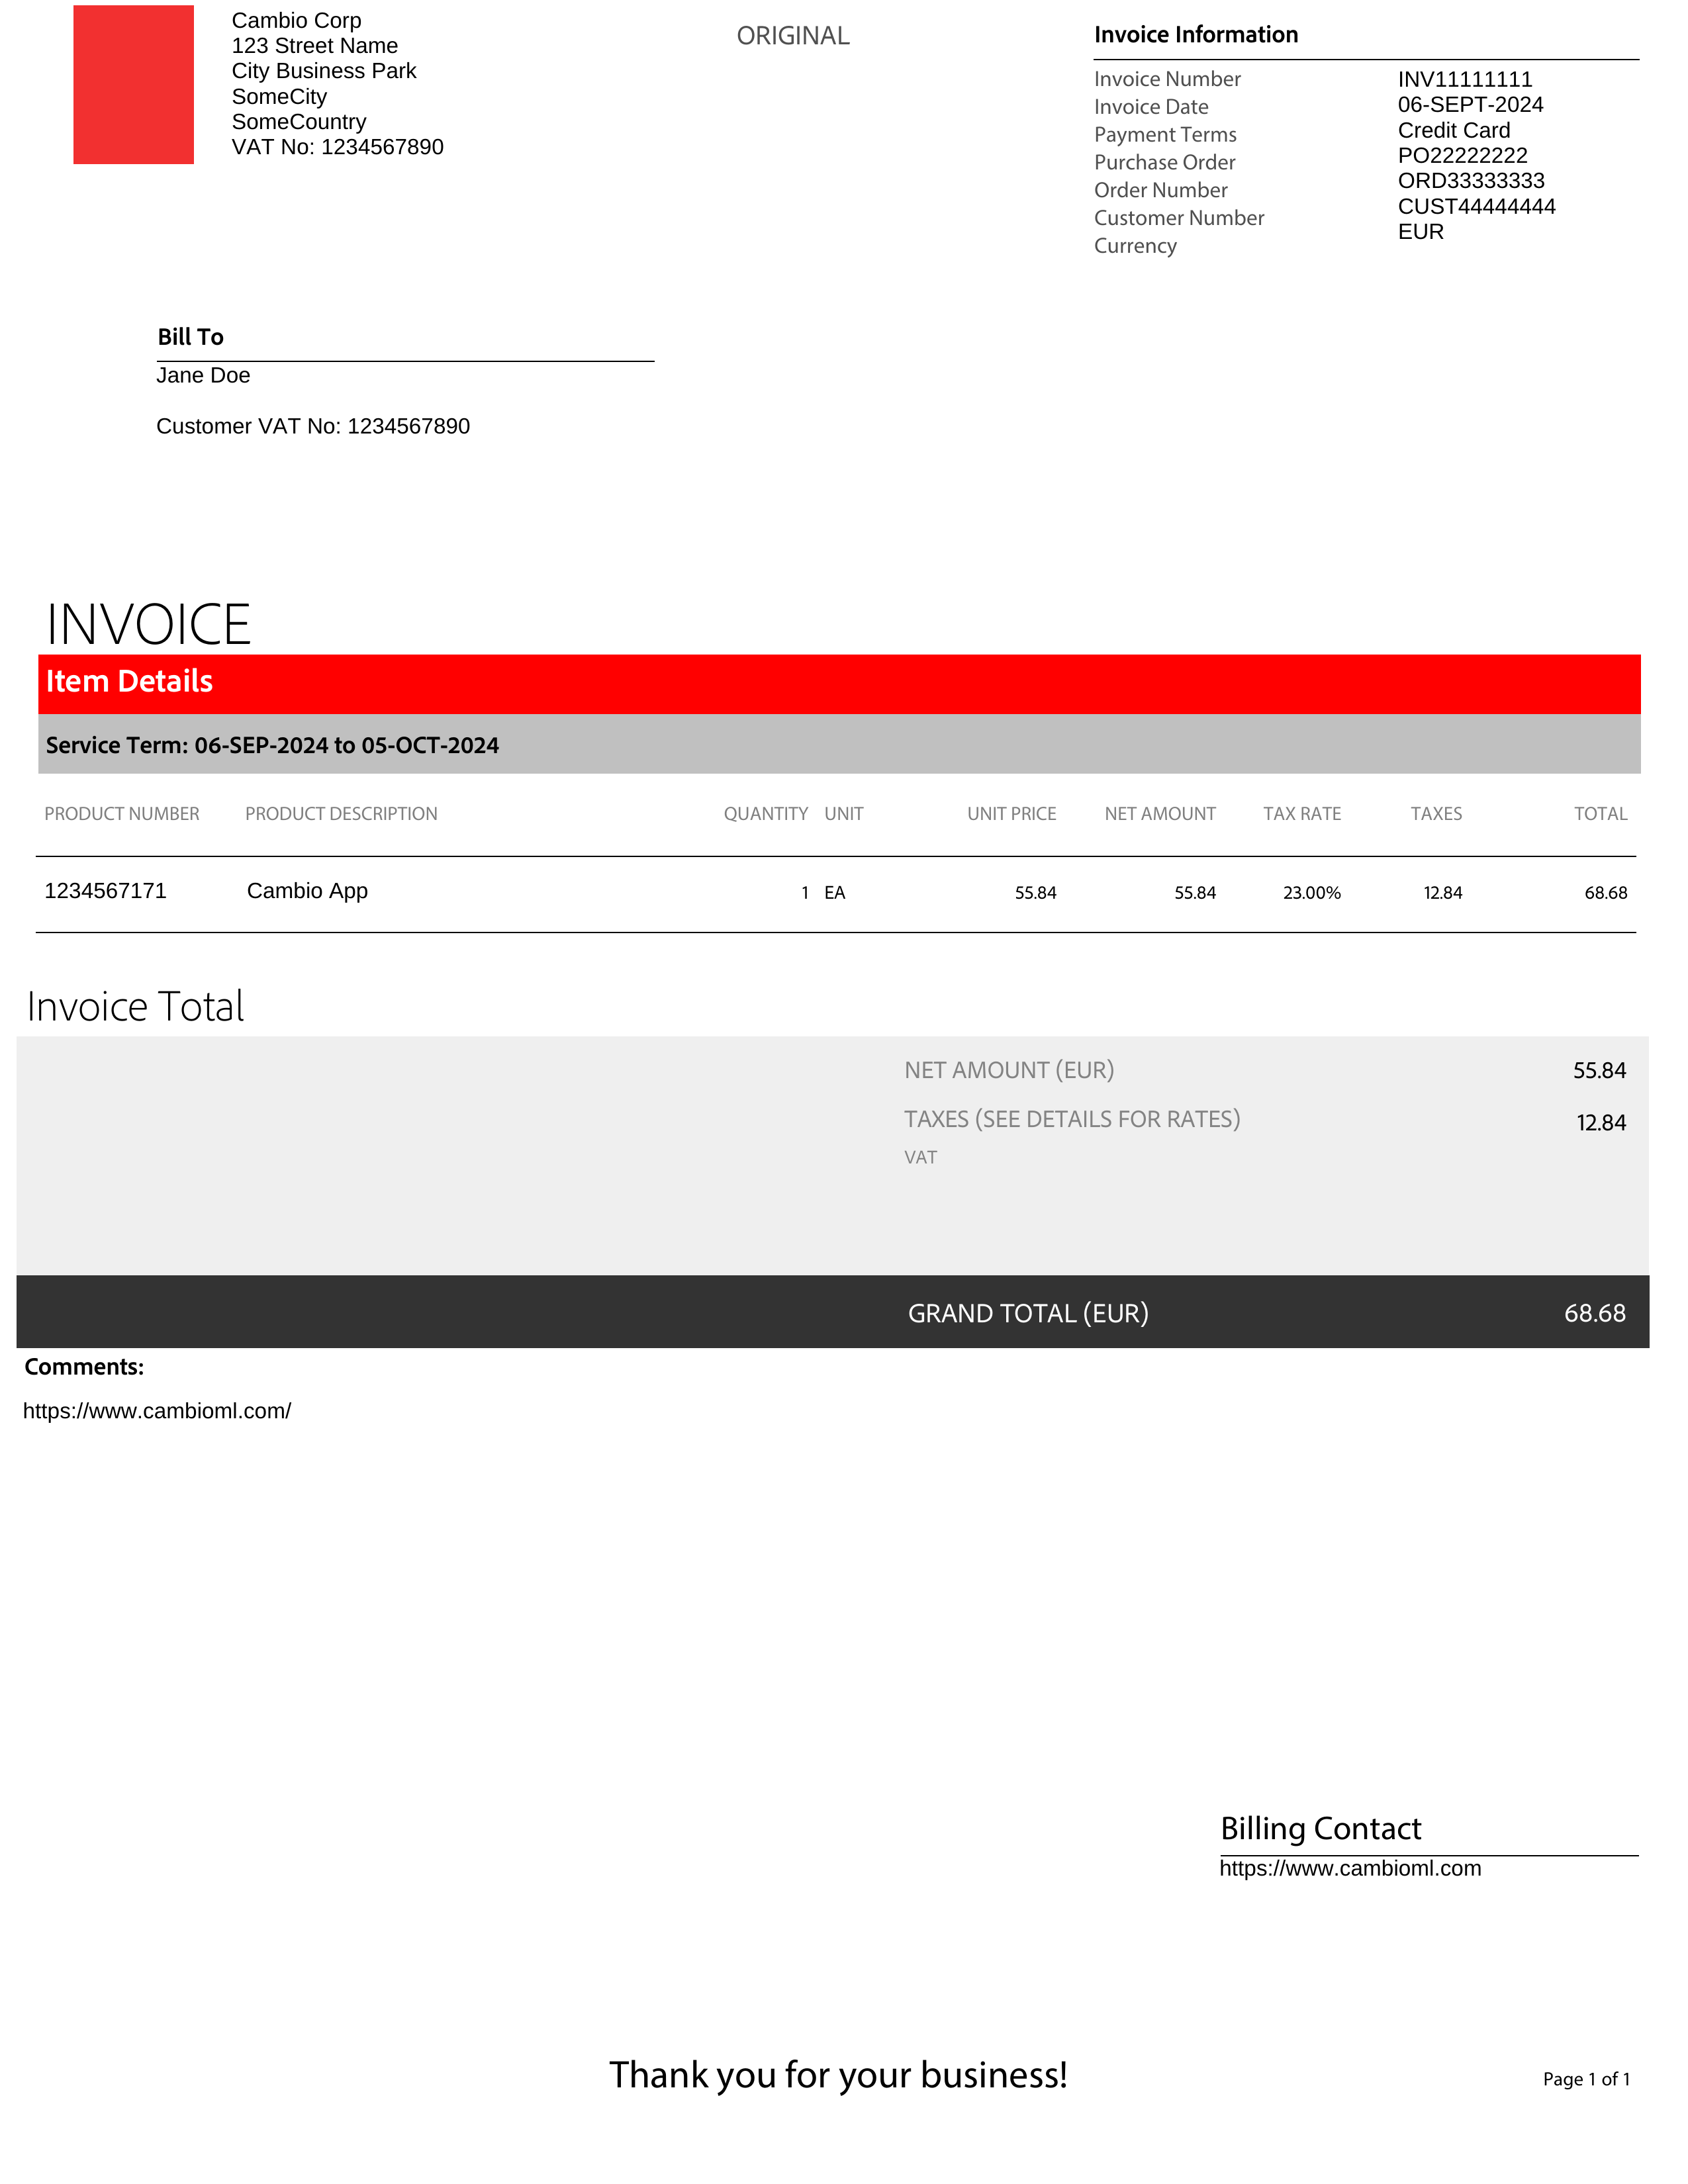

In [5]:
example_local_file = "./sample_data/test_invoice.pdf"

# Convert PDF to a list of images
pages = convert_from_path(example_local_file, 300)  # 300 is the DPI

# Display the first page
display(pages[0])

### 4. Run AnyParser and Extract the Key Value pairs

We will run AnyParser on our sample data and then extract the key value pairs. 

We need to specify 2 parameters:
- `file_path`: The path to the PDF file.
- `extract_instruction`: This is a dictionary of the form `{"key": "key description"}` where the key is the name of the key to extract and the key description is a description of that key.

The extract may take 1-20 seconds per page. Note that this example uses the Synchronous API. To see how AnyParser can be used asynchronously, see the [Asynchronous API notebook](./async_pdf_to_key_value.ipynb).

In [6]:
ap = AnyParser(example_apikey)

extract_instruction = {
                "document_owner": "name of the document owner",
                "invoice_num": "invoice number",
                "po_num": "purchase order number",
                "date": "date of the invoice",
            }


# extract returns a tuple containing the markdown as a string and total time
key_value_result, total_time = ap.extract_key_value(example_local_file, extract_instruction)

display(key_value_result)
print(total_time)

[[{'document_owner': 'Cambio Corp',
   'invoice_num': 'INV11111111',
   'po_num': 'PO22222222',
   'date': '06-SEPT-2024'}]]

Time Elapsed: 5.94 seconds


## End of the notebook

Check more [case studies](https://www.cambioml.com/blog) of CambioML!

<a href="https://www.cambioml.com/" title="Title">
    <img src="./sample_data/cambioml_logo_large.png" style="height: 100px; display: block; margin-left: auto; margin-right: auto;"/>
</a>